In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Datasets\\df_train.csv")
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [3]:
df.drop("date",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              13603 non-null  float64
 1   bedrooms           13603 non-null  int64  
 2   grade              13603 non-null  int64  
 3   has_basement       13603 non-null  bool   
 4   living_in_m2       13603 non-null  float64
 5   renovated          13603 non-null  bool   
 6   nice_view          13603 non-null  bool   
 7   perfect_condition  13603 non-null  bool   
 8   real_bathrooms     13603 non-null  int64  
 9   has_lavatory       13603 non-null  bool   
 10  single_floor       13603 non-null  bool   
 11  month              13603 non-null  int64  
 12  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5)
memory usage: 823.7 KB


In [5]:
df.describe()

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
count,1.360300e+04,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000
mean,4.752861e+05,2.238624,2.530177,181.746181,1.678968,6.579872,2.425568
std,2.073232e+05,0.682151,0.969782,67.917214,0.627218,3.126552,1.071046
min,8.100000e+04,1.000000,1.000000,49.238590,1.000000,1.000000,1.000000
25%,3.150000e+05,2.000000,2.000000,130.064200,1.000000,4.000000,2.000000
50%,4.350000e+05,2.000000,2.000000,171.870550,2.000000,6.000000,2.000000
75%,5.999500e+05,3.000000,3.000000,224.825260,2.000000,9.000000,3.000000
max,1.155000e+06,3.000000,5.000000,391.121630,3.000000,12.000000,4.000000


In [6]:
def boolean(column):
    df[column] = df[column].map({True:1,False:0})
    

In [7]:
boolean("renovated")
boolean("nice_view")
boolean("perfect_condition")
boolean("has_lavatory")
boolean("single_floor")
boolean("has_basement")

In [8]:
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,312000.0,2,2,1,138.42547,0,0,0,2,1,0,5,1
1,310000.0,2,2,0,105.90942,0,0,0,1,1,0,11,3
2,320000.0,2,2,0,117.98681,0,1,0,1,0,1,12,2
3,264500.0,2,3,0,151.43189,0,0,0,2,1,1,2,1
4,700000.0,3,2,1,341.88304,0,0,0,3,0,0,1,4


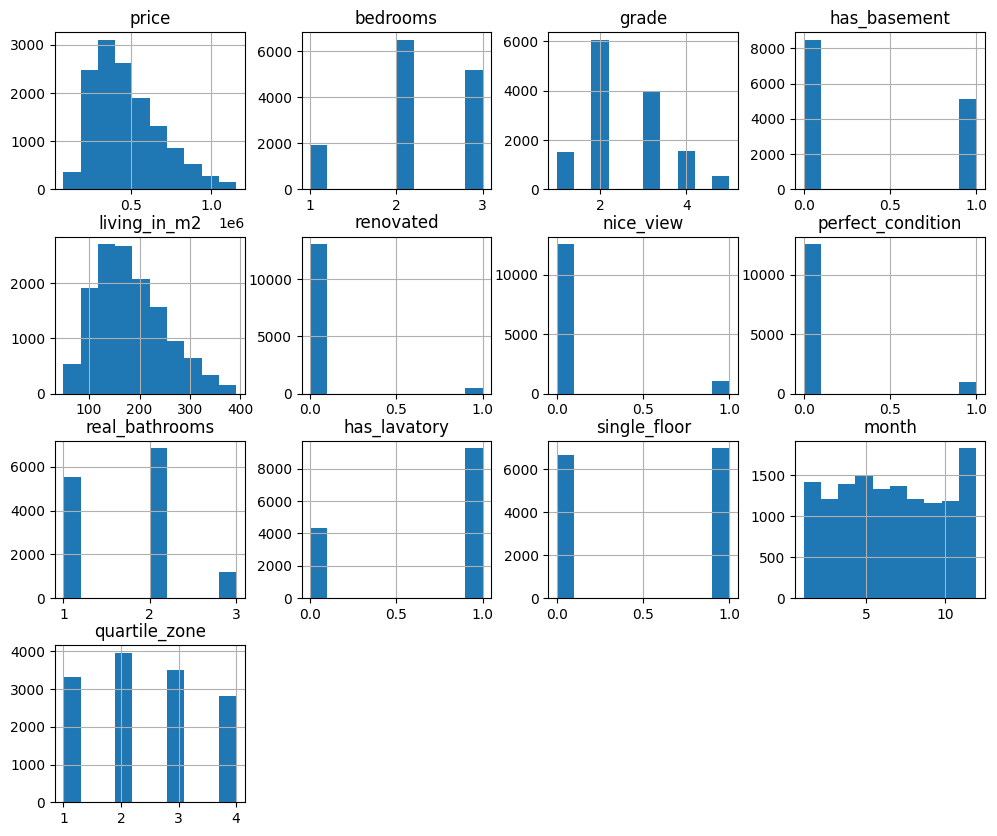

In [9]:
df.hist(figsize=[12,10])
plt.show()

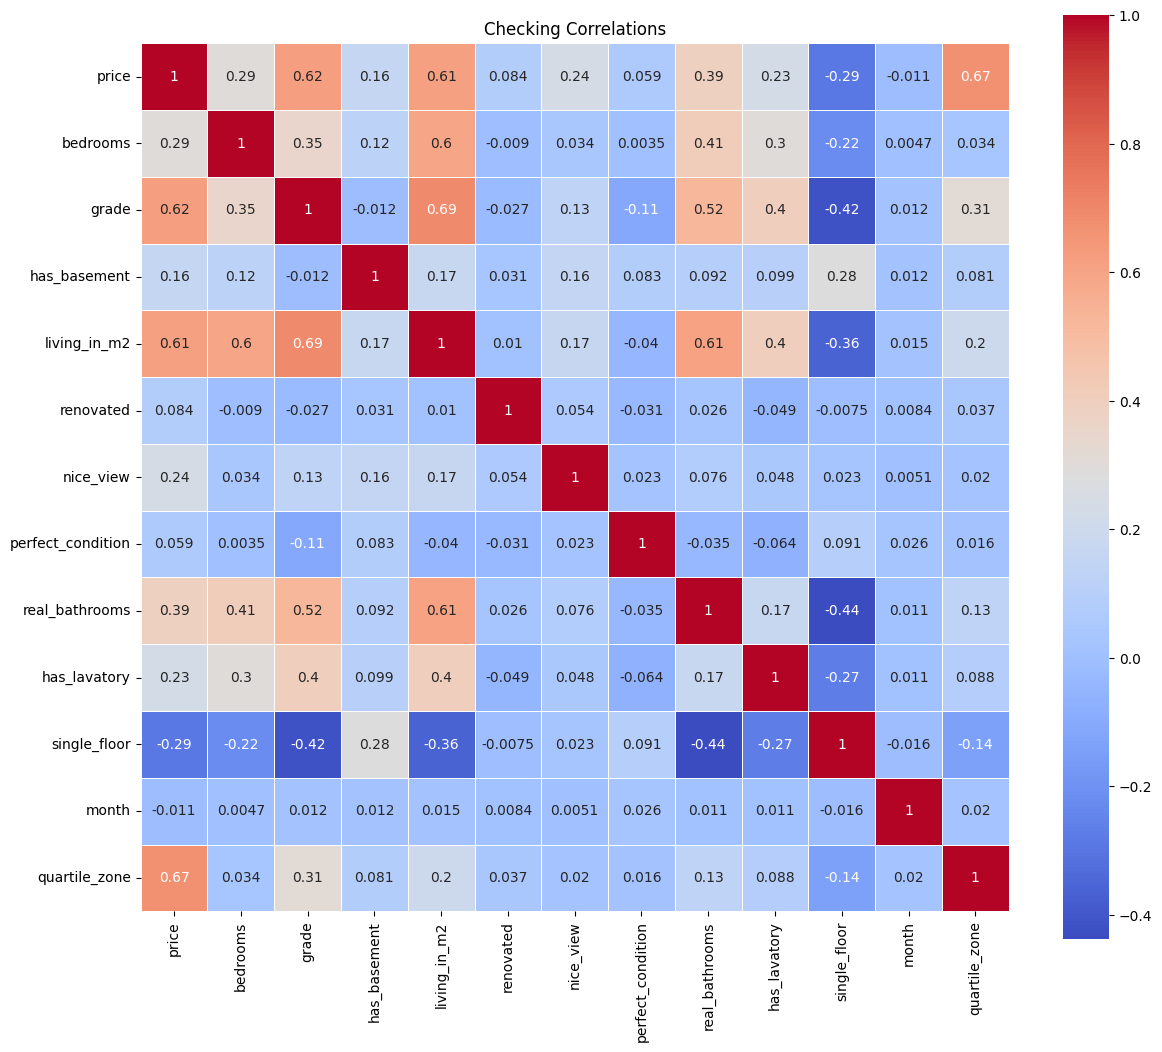

In [10]:
corr = df.corr()
plt.figure(figsize=(14, 12))
plt.title("Checking Correlations")
sns.heatmap(corr,annot=True,cmap="coolwarm",square=True,linewidths=0.5)
plt.show()

In [11]:
df.drop(["renovated","perfect_condition","month"],axis=1,inplace=True)

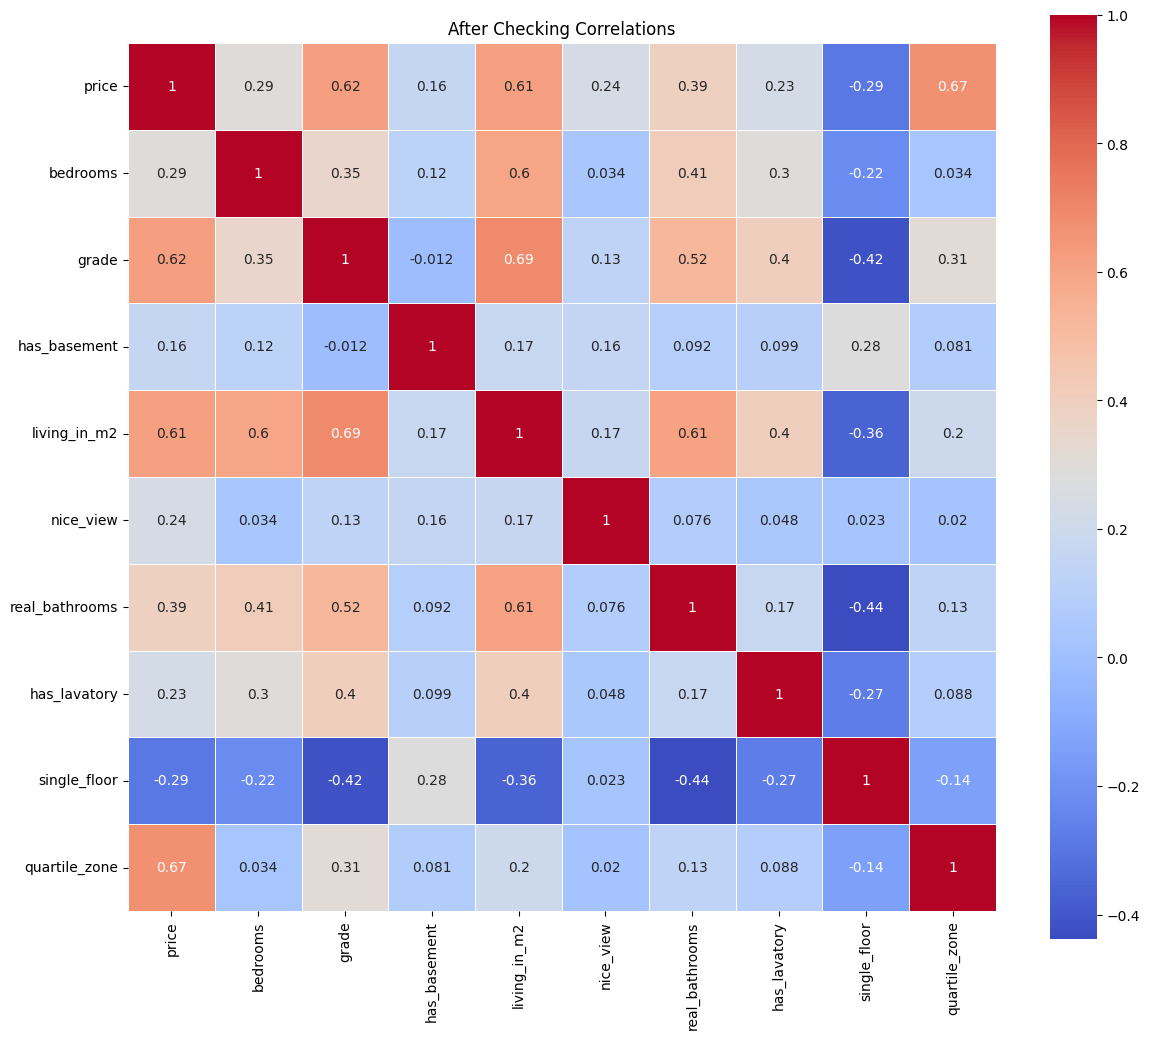

In [12]:
corr = df.corr()
plt.figure(figsize=(14, 12))
plt.title("After Checking Correlations")
sns.heatmap(corr,annot=True,cmap="coolwarm",square=True,linewidths=0.5)
plt.show()

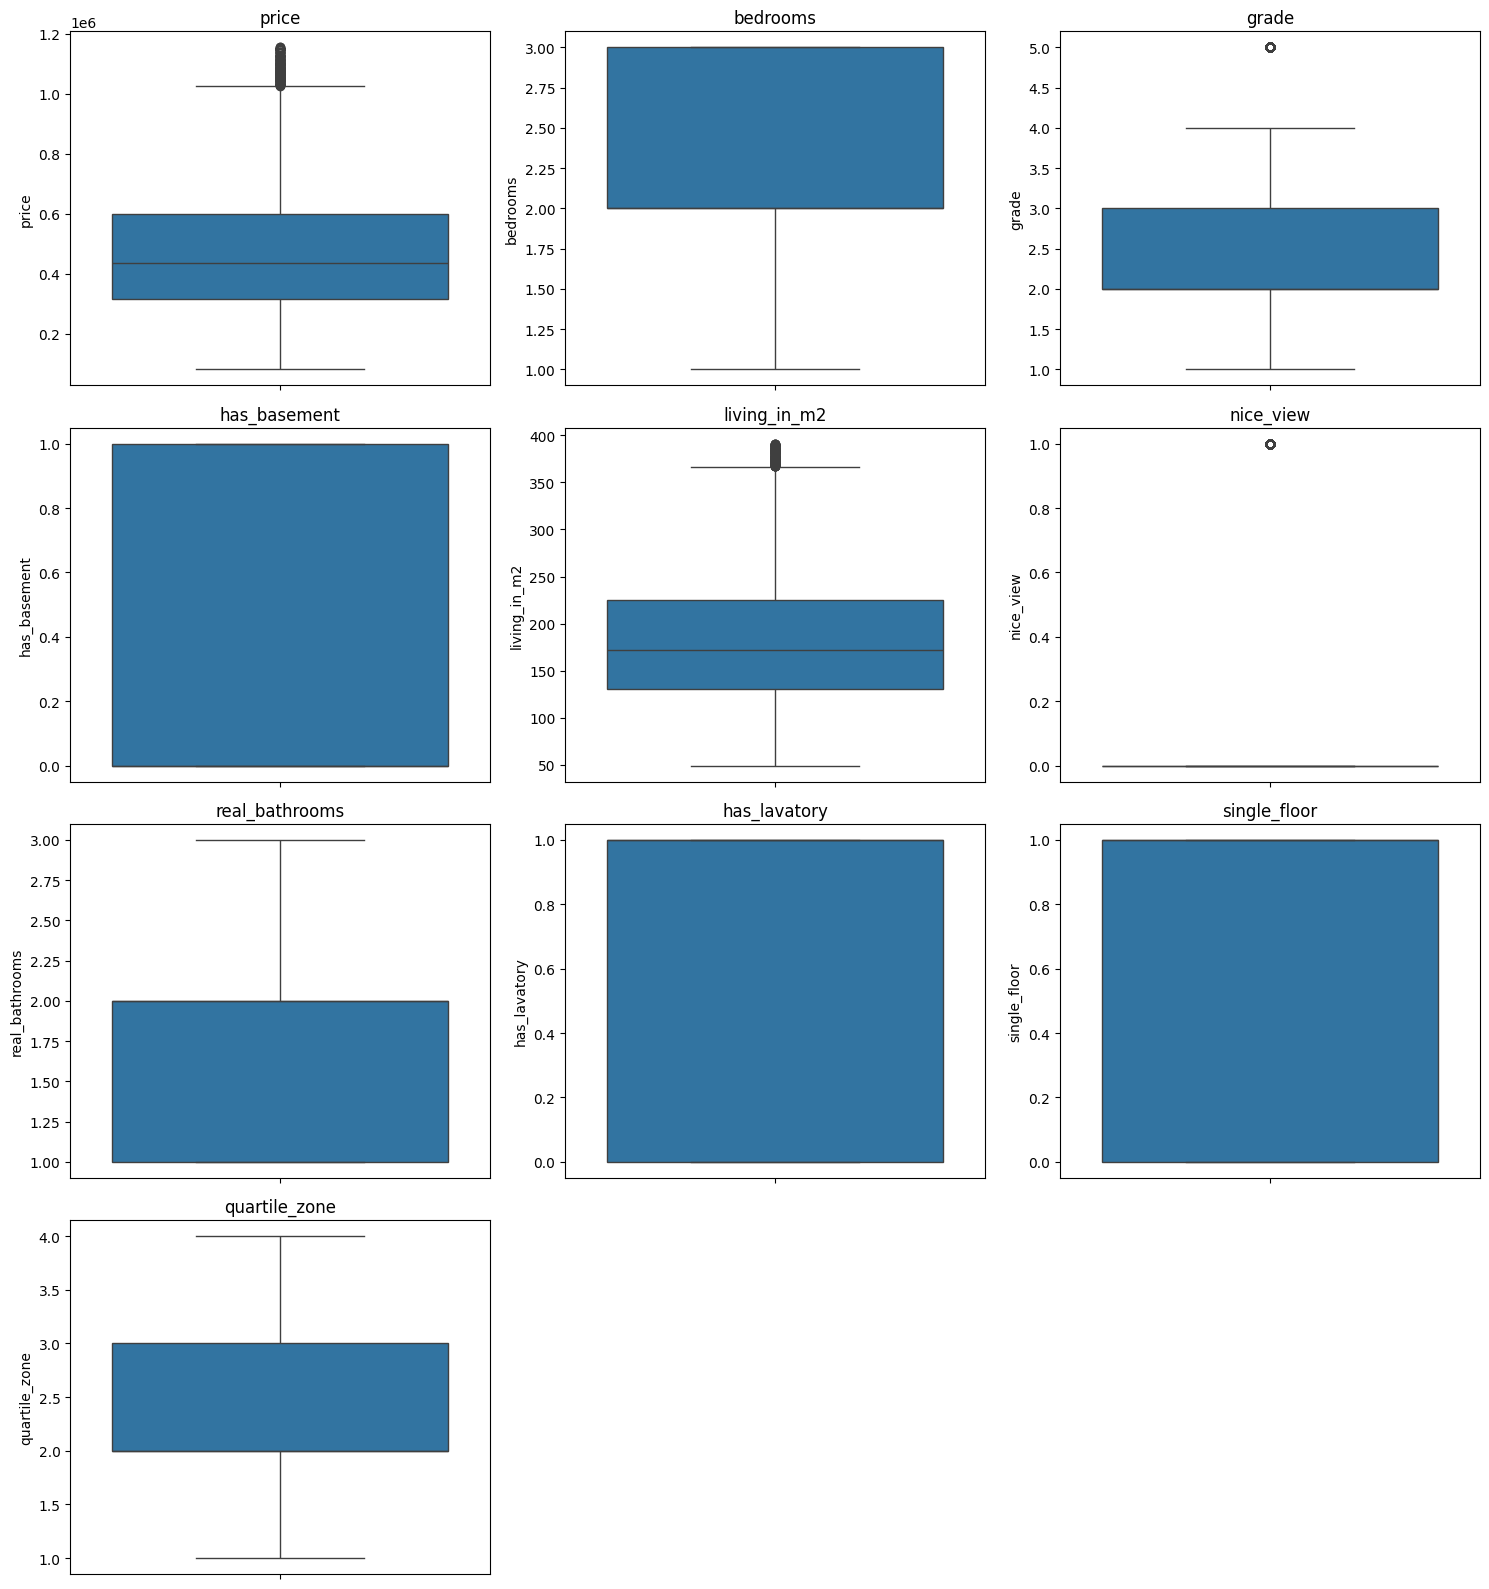

In [13]:
columns = df.columns  # or select specific numeric columns: df.select_dtypes(include='number').columns
n_cols = 3  # number of plots per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # calculate rows

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [14]:
def outliers(column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print("Total outliers: ", outlier_rows.shape[0])

    # Optionally cap outliers
    df[column_name] = df[column_name].clip(upper=upper_bound)

    sns.boxplot(x=df[column_name])


Lower bound: -112425.0, Upper bound: 1027375.0
Total outliers:  188


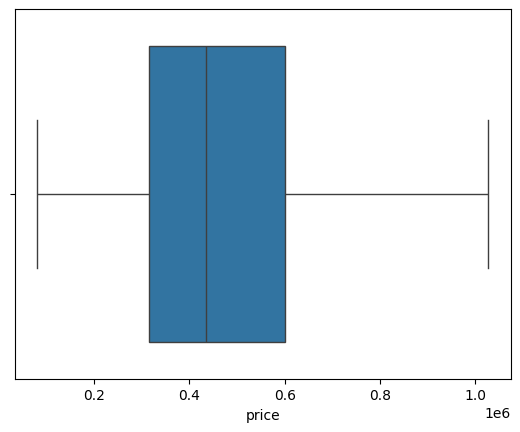

In [15]:
outliers("price")

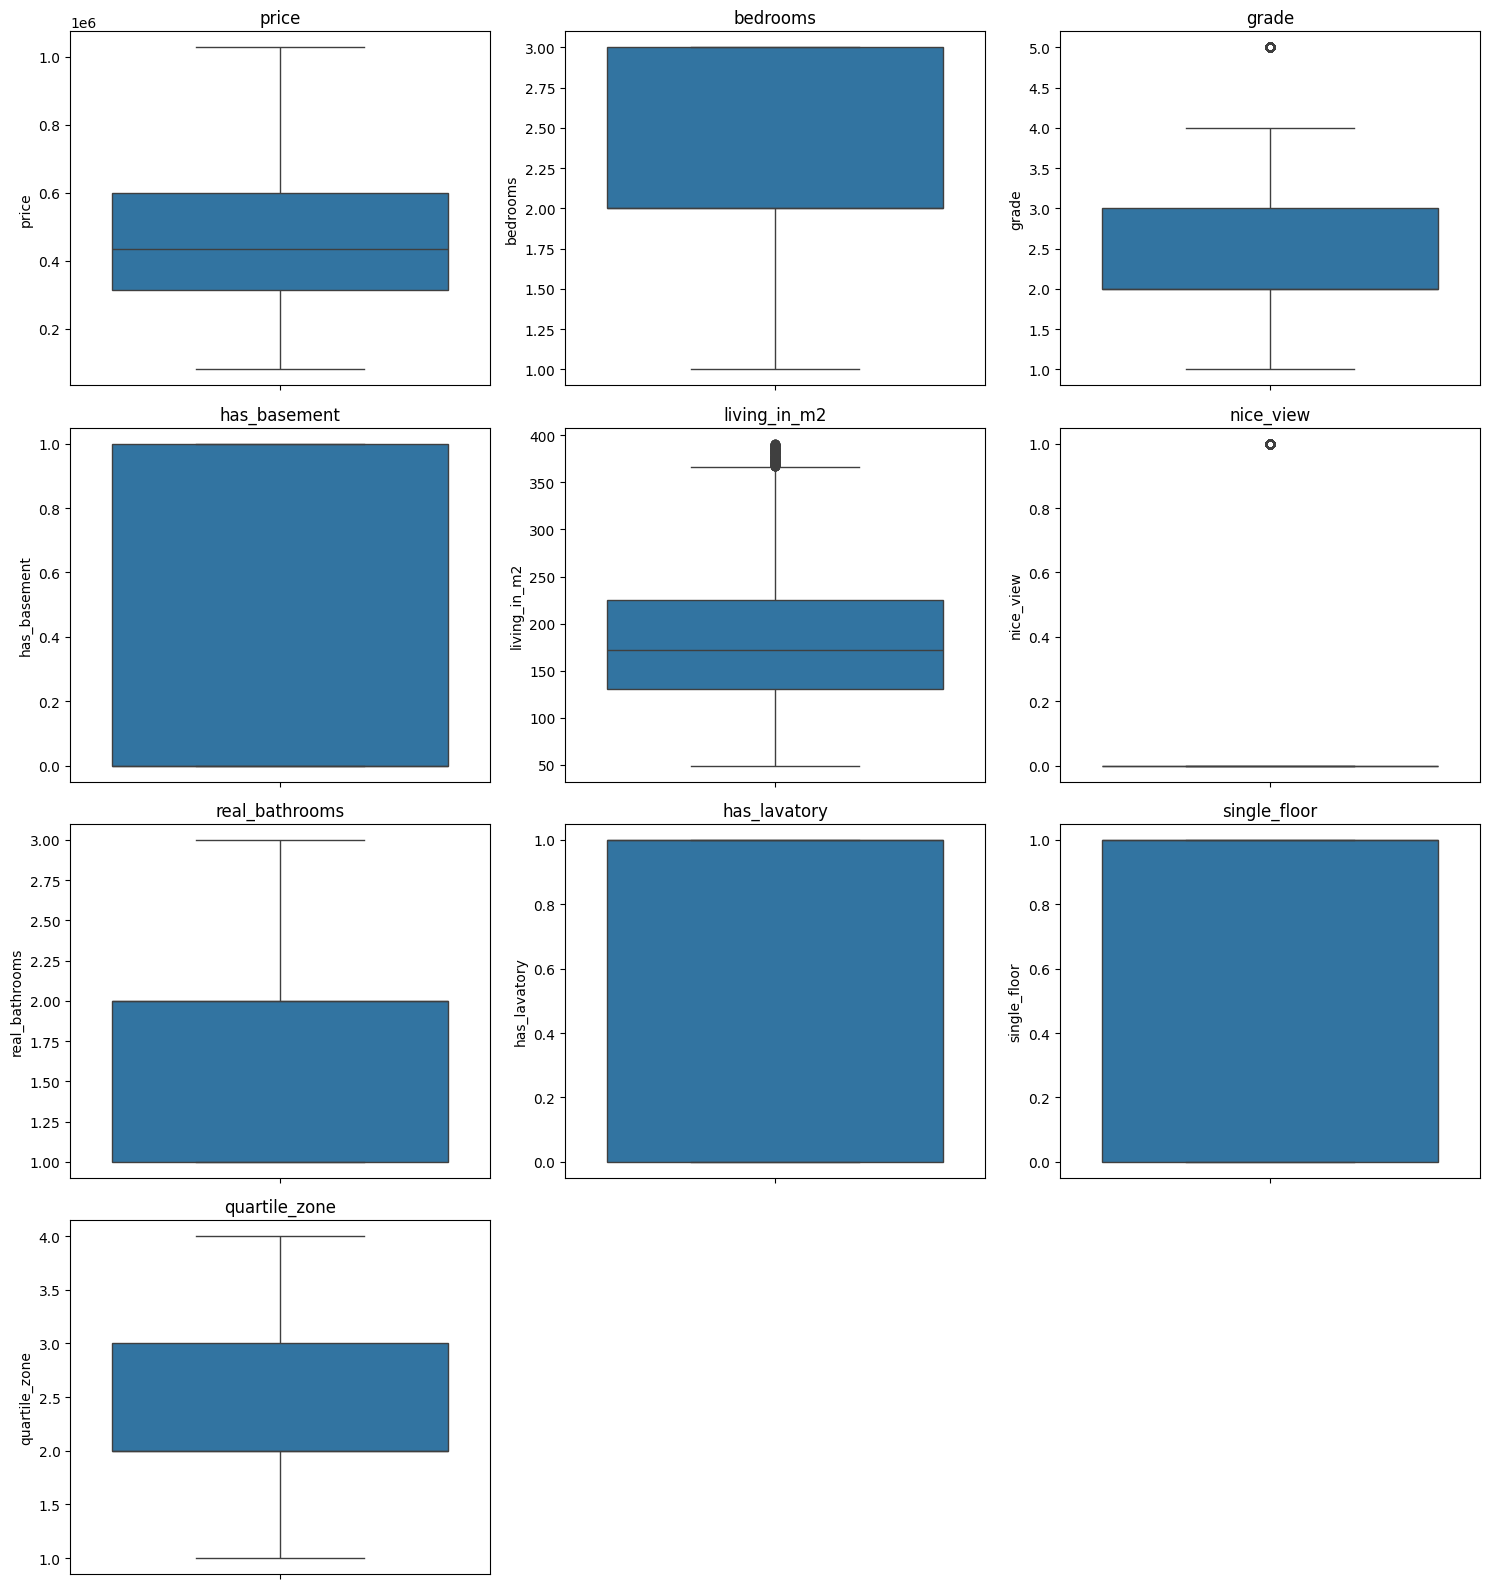

In [16]:
columns = df.columns  # or select specific numeric columns: df.select_dtypes(include='number').columns
n_cols = 3  # number of plots per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # calculate rows

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [18]:
X = df.drop("price",axis=1)
y = df["price"]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(x_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 10804999215.659534
RMSE: 103947.09815891704
MAE: 78295.37209451245
R2: 0.7337645042542795


In [23]:
import pickle

with open('House_price_prediction.pkl', 'wb') as f:
    pickle.dump(model, f)

In [24]:
df.head()

,price,bedrooms,grade,has_basement,living_in_m2,nice_view,real_bathrooms,has_lavatory,single_floor,quartile_zone
0,312000.0,2,2,1,138.42547,0,2,1,0,1
1,310000.0,2,2,0,105.90942,0,1,1,0,3
2,320000.0,2,2,0,117.98681,1,1,0,1,2
3,264500.0,2,3,0,151.43189,0,2,1,1,1
4,700000.0,3,2,1,341.88304,0,3,0,0,4
